In [49]:
"""
==========================================
3D voxel / volumetric plot with RGB colors
==========================================

Demonstrates using `.Axes3D.voxels` to visualize parts of a color space.
"""
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 447 x 297 pixels

#arr = np.loadtxt('3D bubbles.txt')
arr =pd.read_csv('3D bubbles.txt', sep='\t')

arr.info()
arr.keys()
print(arr)
new_arr = arr[['X','Z','Y']]
arr=new_arr
print(arr)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
X           23 non-null float64
Y           23 non-null float64
Z           23 non-null float64
diameter    23 non-null int64
dtypes: float64(3), int64(1)
memory usage: 816.0 bytes
            X       Y          Z  diameter
0    0.000000    0.00   0.000000        27
1  -24.750971   -4.50  -6.521680        27
2   14.056107  -14.75 -13.043359        27
3  -17.111782  -19.25  17.391146        27
4    8.861459  -20.25  14.347695        27
5  -24.139836  -25.00 -27.391054        27
6   -9.778161  -25.75  -3.478229        27
7  -22.000863  -34.50  45.216978        27
8    8.250324  -37.25 -39.564856        27
9  -13.139404  -40.00  29.130169        27
10  10.389297  -49.00  38.260520        27
11 -11.611567  -57.00  53.912551        27
12  27.418213  -60.50  17.173893        27
13 -17.722918  -54.00 -48.695207        27
14  11.000432  -61.25  -0.869557        27
15  -1.527838  -80.75  41.303

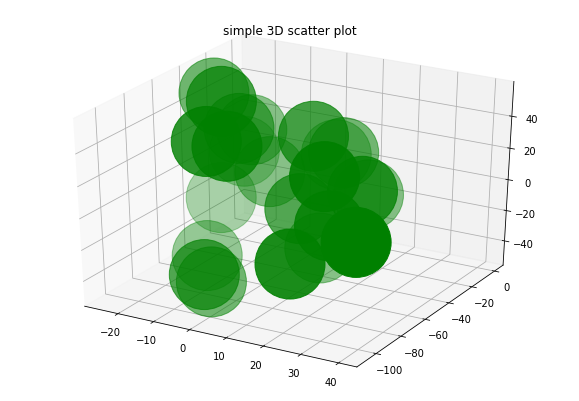

In [320]:
x = arr.X
y = arr.Y
z = arr.Z

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(x,y,z, color = "green", s=70**2)
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

In [20]:
import math


def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians.
    """
    axis = np.asarray(axis)
    axis = axis / math.sqrt(np.dot(axis, axis))
    a = math.cos(theta / 2.0)
    b, c, d = -axis * math.sin(theta / 2.0)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])

v = [3, 5, 0]
axis = [4, 4, 1]
theta = 1.2 

print(np.dot(rotation_matrix(axis, theta), v))

[ 2.74911638  4.77180932  1.91629719]


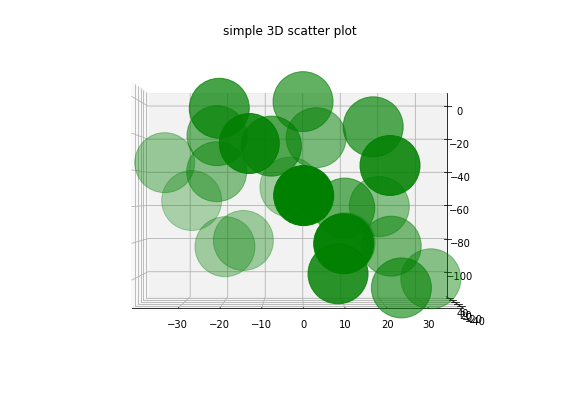

In [358]:
axis = [0, 0, 1]
rot_angle = 35.1 - 15
theta = np.deg2rad(rot_angle)

v = [
    [0,0,0],
    [10,0,20] 
]
v = arr

vrot = np.dot(rotation_matrix(axis, theta), np.transpose(v))
vrot = np.transpose(vrot)

vrot_plus = np.dot(rotation_matrix(axis, theta), np.transpose(v))
vrot_plus = np.transpose(vrot_plus)

vrot_minus = np.dot(rotation_matrix(axis, -theta), np.transpose(v))
vrot_minus = np.transpose(vrot_minus)

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")


ax.view_init(elev=0., azim=-90.)
ax.scatter3D(vrot[:,0],vrot[:,1],vrot[:,2], color = "green", s=60**2)

plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

v2D_plus = vrot_plus[:,[0,2]]
v2D_minus = vrot_minus[:,[0,2]]

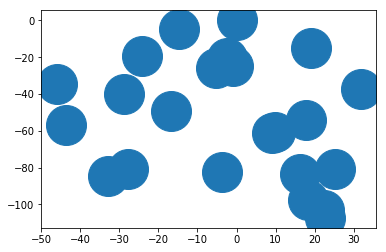

In [349]:
plt.scatter(v2D_plus[:,0],v2D_plus[:,1], s=40**2)
plt.show()

In [ ]:
def make_sphere_generic(n, radius, pixel_size=1., material=None, queue=None, x_centre=0, y_centre=0, xdil=1, ydil=1):
    """Make a sphere with image shape (*n*, *n*), *radius* and *pixel_size*. Sphere center is in n /
    2 + 0.5, which means between two adjacent pixels. *pixel_size*, *material* and *queue*, which is
    an OpenCL command queue, are used to create :class:`.StaticBody`.
    xcentre, ycentre control the position of the centre of the body in units of half of the field of
        view. 0 is the centre of the image, while +-1 are its borders.
    xdil, ydil control the dilatation of the body, making the sphere an ellipse.
    """
    xdil = float(xdil)
    ydil = float(ydil)
    image = np.zeros((n, n), dtype = "float64")
    y, x = (np.mgrid[(-n / 2 - y_centre * n / 2) / ydil : (n / 2 - y_centre * n / 2) / ydil : 1 / ydil, 
                     (-n / 2 - x_centre * n / 2) / xdil : (n / 2 - x_centre * n / 2) / xdil : 1 / xdil])                     
    x = (x + .5) * pixel_size
    y = (y + .5) * pixel_size
    radius = radius
    valid = np.where(x ** 2 + y ** 2 < radius ** 2)
    image[valid] = 2 * np.sqrt(radius ** 2 - x[valid] ** 2 - y[valid] ** 2)

    return image

img = make_sphere_generic(50, 10)

plt.imshow(img)
plt.show()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

pd.DataFrame(img)

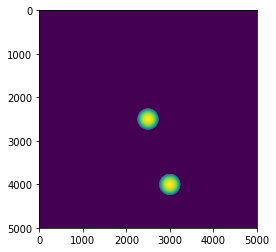

In [312]:
def make_sphere_generic(n, radius, pixel_size=1, material=None, queue=None, x_centre=0, y_centre=0, xdil=1., ydil=1.):
    """Make a sphere with image shape (*n*, *n*), *radius* and *pixel_size*. Sphere center is in n /
    2 + 0.5, which means between two adjacent pixels. *pixel_size*, *material* and *queue*, which is
    an OpenCL command queue, are used to create :class:`.StaticBody`.
    xcentre, ycentre control the position of the centre of the body in units of half of the field of
        view. 0 is the centre of the image, while +-1 are its borders.
    xdil, ydil control the dilatation of the body, making the sphere an ellipse.
    """
    xdil = float(xdil)
    ydil = float(ydil)
    image = np.zeros((n, n), dtype = "float64")
    y, x = (np.mgrid[(-n / 2 - y_centre ) / ydil : (n / 2 - y_centre ) / ydil : 1 / ydil, 
                     (-n / 2 - x_centre ) / xdil : (n / 2 - x_centre ) / xdil : 1 / xdil])                     
    x = (x + .5) * pixel_size
    y = (y + .5) * pixel_size
    radius = radius
    valid = np.where(x ** 2 + y ** 2 < radius ** 2)
    image[valid] = 2 * np.sqrt(radius ** 2 - x[valid] ** 2 - y[valid] ** 2)

    return image, x, y

img_1, _, _ = make_sphere_generic(5000, 250, x_centre=0., y_centre=0.)
img_2, _, _ = make_sphere_generic(5000, 250, x_centre=500, y_centre=1500)



img_test = img_1 + img_2

plt.imshow(img_test)
plt.show()


first bubble found!
second bubble found!
3rd bubble found!


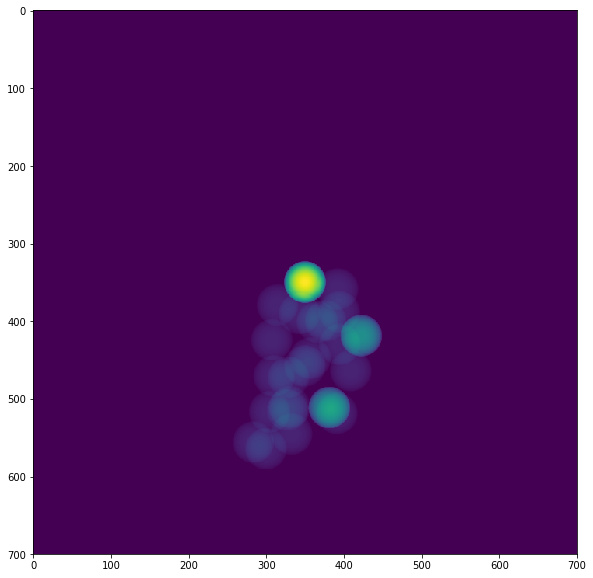

In [360]:
pix_real = 4.0e-6
pix_compute = 2.0e-6
pix_rate = int(pix_real / pix_compute)
radius = pix_rate * 27.0 / 2
fov = int( 2.5 * pix_rate * ( np.max(v2D_plus) - np.min(v2D_plus) ))
img = np.zeros((fov, fov), dtype = "float64")
for i_point,point in enumerate(v2D_plus):
    xc = point[0]
    yc = point[1]
    image_now, _, _ = make_sphere_generic(fov, radius, x_centre=xc*pix_rate, y_centre=yc*pix_rate)
    if xc == 0. and yc ==0.:
        image_now = 10. * image_now
        print("first bubble found!")
    if i_point == 7:
        image_now = 5. * image_now
        print("second bubble found!")
    if i_point == 15:
        image_now = 5. * image_now
        print("3rd bubble found!")
    img += image_now

# plt.imshow(img)
plt.figure(figsize = (10,10))
img_show = img[700:0:-1, 700:0:-1]
plt.imshow(img_show)
plt.show()

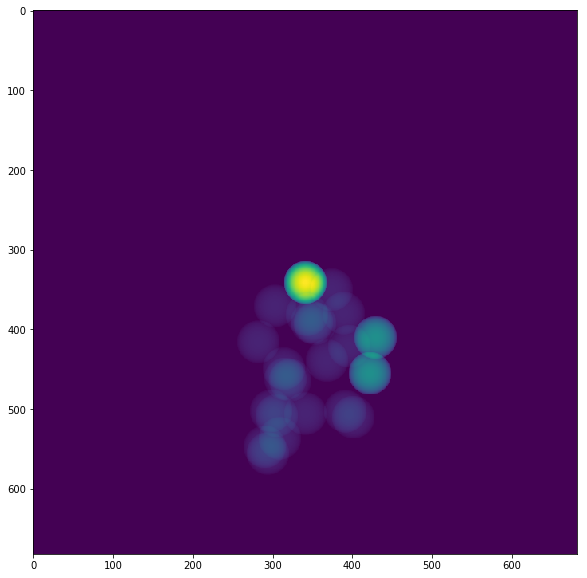

In [346]:
# plt.imshow(img)
plt.figure(figsize = (10,10))
img_show = img[700:0:-1, 700:0:-1]
plt.imshow(img_show)
plt.show()  

1080.0


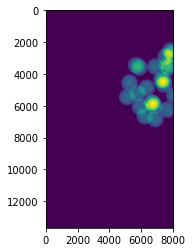

In [284]:
print(2*radius)
detail = img[:,:8000]
plt.imshow(detail)
plt.show()

In [269]:
import scipy.constants as con
electron_radius = con.physical_constants['classical electron radius'][0]  # 2.81794*10**-15 m
h_planck = con.physical_constants['Planck constant in eV s'][0]  # 4.1356692*10**-15 eV s
# sci.c = c = speed of light in vacuum = 2.99792458*10**8 m/s
EeV = 12_000
wavelength = h_planck * con.c / EeV
wavelength

1.0332016448850776e-10

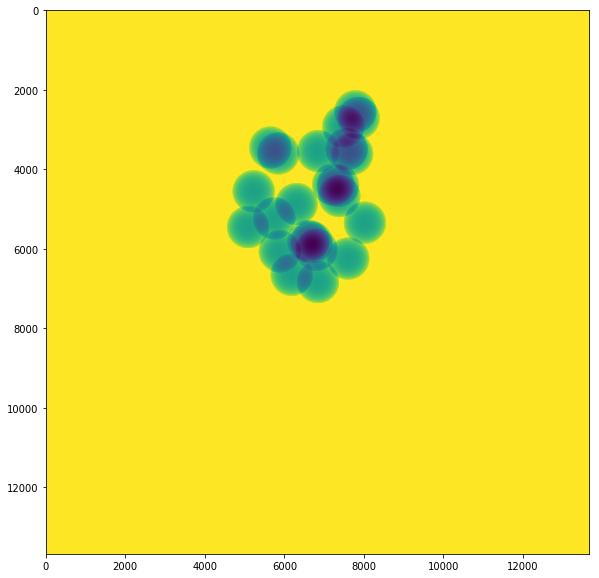

1.0

In [270]:
energy, delta, beta = 12_000, 3.24e-6, 1.96e-8

refractive_index = 1 - delta - 1j * beta

pix = pix_compute 

beta = 2 * np.pi * refractive_index / wavelength
img_um = img * pix
transmitted_wavefield = np.exp( -1j * img_um * beta)
transmitted_image = np.absolute(transmitted_wavefield)**2
#transmitted_image[150,150]

trans = transmitted_image


plt.figure(figsize = (10,10))
plt.imshow(trans)
plt.show() 

trans[2500,2500]

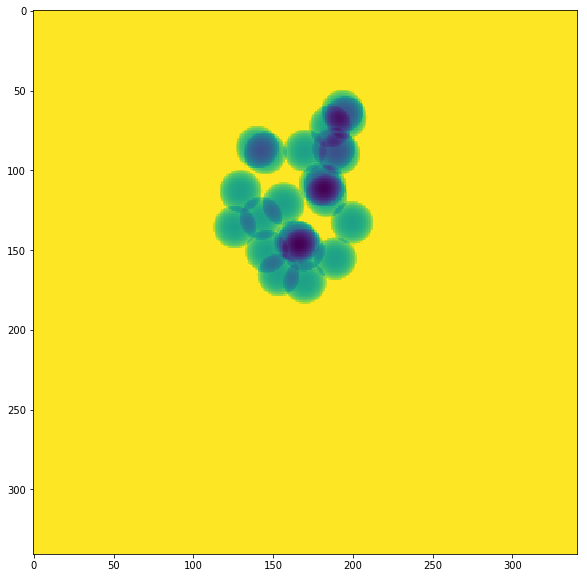

In [192]:
distance = 0.130 # m
Kz = 2 * np.pi / wavelength
propagator = np.exp( 1j * Kz * distance)

result_fft = np.fft.fft2(transmitted_wavefield) * propagator
result = np.absolute( np.fft.ifft2(result_fft) )**2

plt.figure(figsize = (10,10))
plt.imshow(result)
plt.show() 

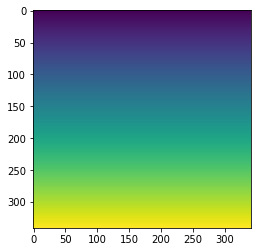

In [184]:
_, x_mesh, y_mesh = make_sphere_generic(fov, radius, x_centre=xc, y_centre=yc, pixel_size=4.0e-6)

plt.imshow(y_mesh)
plt.show() 

In [220]:
def compute_fourier_propagator(n, lam, z, ps, fresnel=True):

    lam = lam
    z = z
    ps = ps

    freqs = np.fft.fftfreq(n)
    f = np.tile(freqs, [n, 1])
    g = np.copy(f.transpose())
    f /= ps
    g /= ps

    if fresnel:
        result = np.exp(1j * 2 * np.pi / lam * z) * \
            np.exp(-1j * np.pi * lam * z * (f ** 2 + g ** 2))
    else:
        result = np.exp(1j * 2 * np.pi / lam * z * np.sqrt(1 - (f * lam) ** 2 - (g * lam) ** 2))

    return result

ps = pix
np_full_propagator = compute_fourier_propagator(5000, wavelength, distance, ps, fresnel=False)

result_fft = np.fft.fft2(transmitted_wavefield) * np_full_propagator
result_fft = np.fft.fftshift(result_fft)
result_fft = result_fft[100:4900,100:4900]
result_fft = np.fft.fftshift(result_fft)
result = np.absolute( np.fft.ifft2(result_fft) )**2



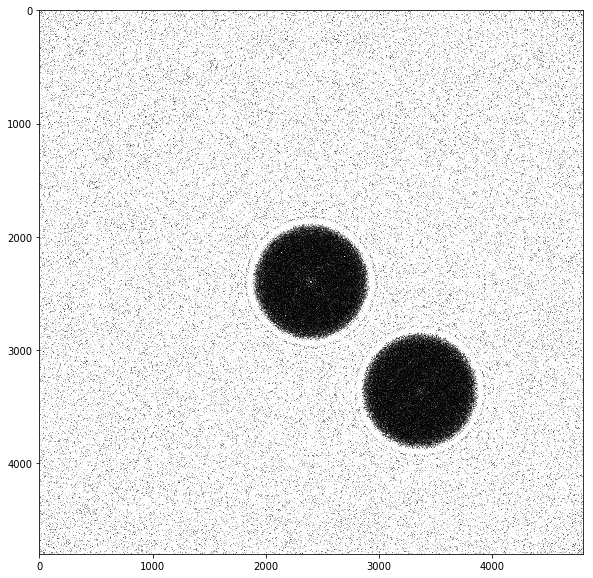

In [221]:
plt.figure(figsize = (10,10))
plt.imshow(result, vmin=0., vmax=1., cmap='gray')
plt.show() 

In [209]:
mollifier = get_gauss_2d(size, sigma, fourier=False, queue=queue, block=block)

0.082522026472983415

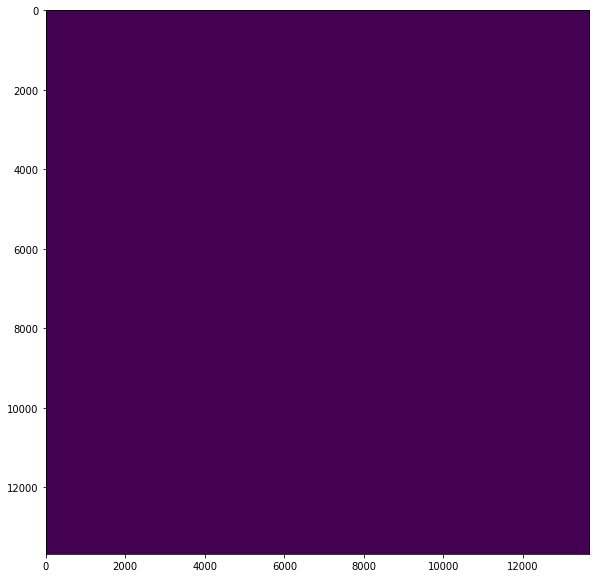

In [272]:
def make_gauss_2D(n, sigma, pixel_size=1, material=None, queue=None, x_centre=0, y_centre=0, xdil=1., ydil=1.):
    """Make a sphere with image shape (*n*, *n*), *radius* and *pixel_size*. Sphere center is in n /
    2 + 0.5, which means between two adjacent pixels. *pixel_size*, *material* and *queue*, which is
    an OpenCL command queue, are used to create :class:`.StaticBody`.
    xcentre, ycentre control the position of the centre of the body in units of half of the field of
        view. 0 is the centre of the image, while +-1 are its borders.
    xdil, ydil control the dilatation of the body, making the sphere an ellipse.
    """
    xdil = float(xdil)
    ydil = float(ydil)
    image = np.zeros((n, n), dtype = "float64")
    y, x = (np.mgrid[(-n / 2 - y_centre ) / ydil : (n / 2 - y_centre ) / ydil : 1 / ydil, 
                     (-n / 2 - x_centre ) / xdil : (n / 2 - x_centre ) / xdil : 1 / xdil])                     
    x = (x + .5) * pixel_size
    y = (y + .5) * pixel_size
    sigmaX = sigma
    sigmaY = sigma
    image = ( 1 / (2 * np.pi * sigmaX * sigmaX) ) * np.exp( - ( x**2 / (2 * sigmaX**2) + y**2 / (2 * sigmaY**2) ) )

    return image, x, y

gauss, _, _ = make_gauss_2D(fov, 0.4e-6, pixel_size = pix_compute)

np.shape(gauss)

plt.figure(figsize = (10,10))
plt.imshow(gauss)
plt.show() 

In [273]:
ps = pix_compute
np_full_propagator = compute_fourier_propagator(fov, wavelength, distance, ps, fresnel=False)

result_fft = np.fft.fft2(transmitted_wavefield) * np_full_propagator * np.fft.fft2(np.fft.fftshift(gauss) )
result_fft = np.fft.fftshift(result_fft)
result_fft = result_fft #[100:4900,100:4900]
result_fft = np.fft.fftshift(result_fft)
result = np.absolute( np.fft.ifft2(result_fft) )**2


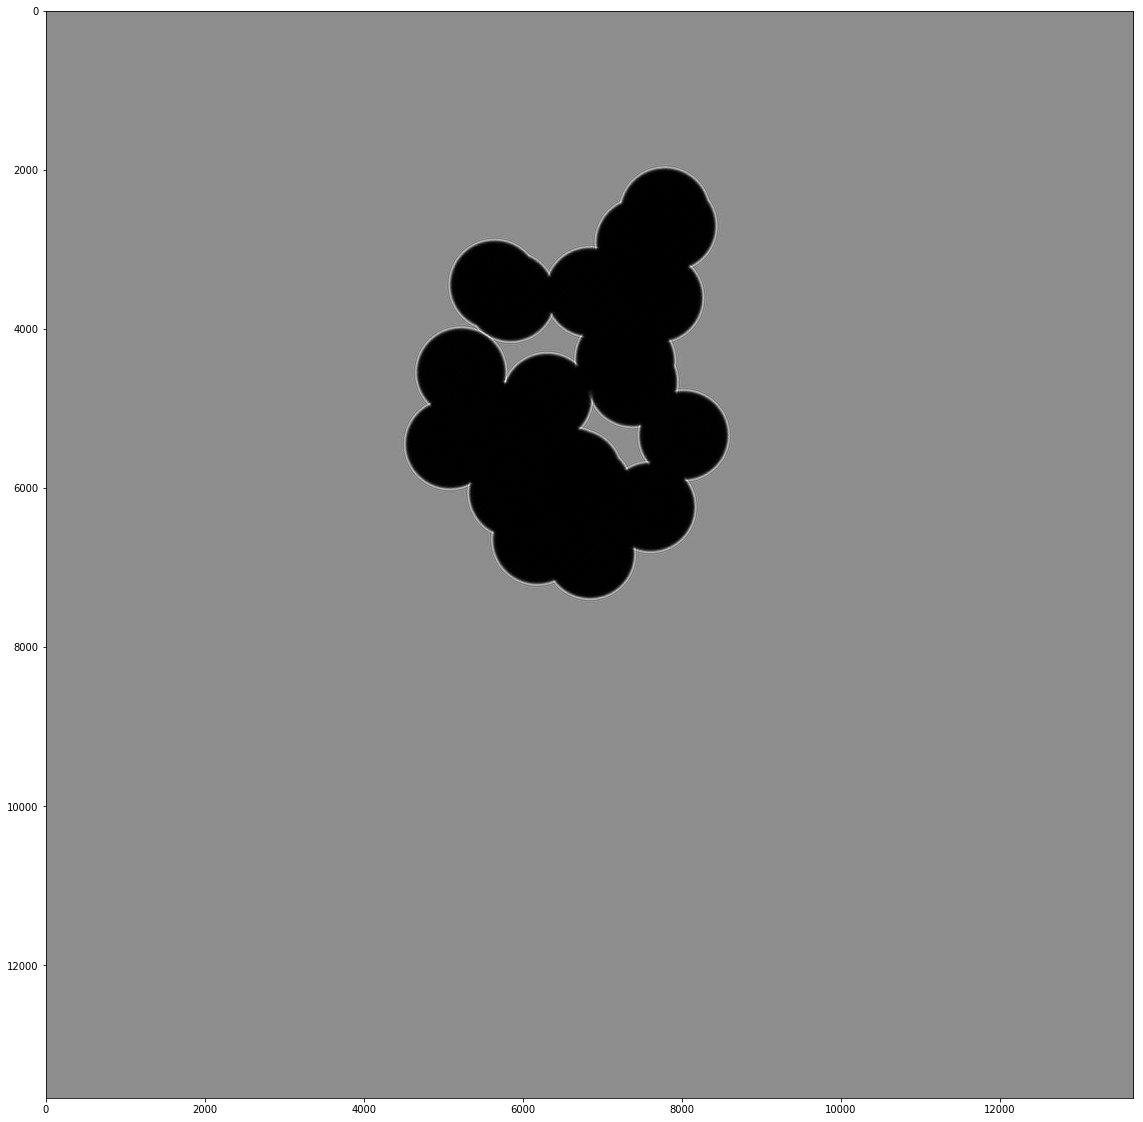

In [275]:
plt.figure(figsize = (20,20))
plt.imshow(result, vmin=0., vmax=np.max(result)*1, cmap='gray')
plt.show() 

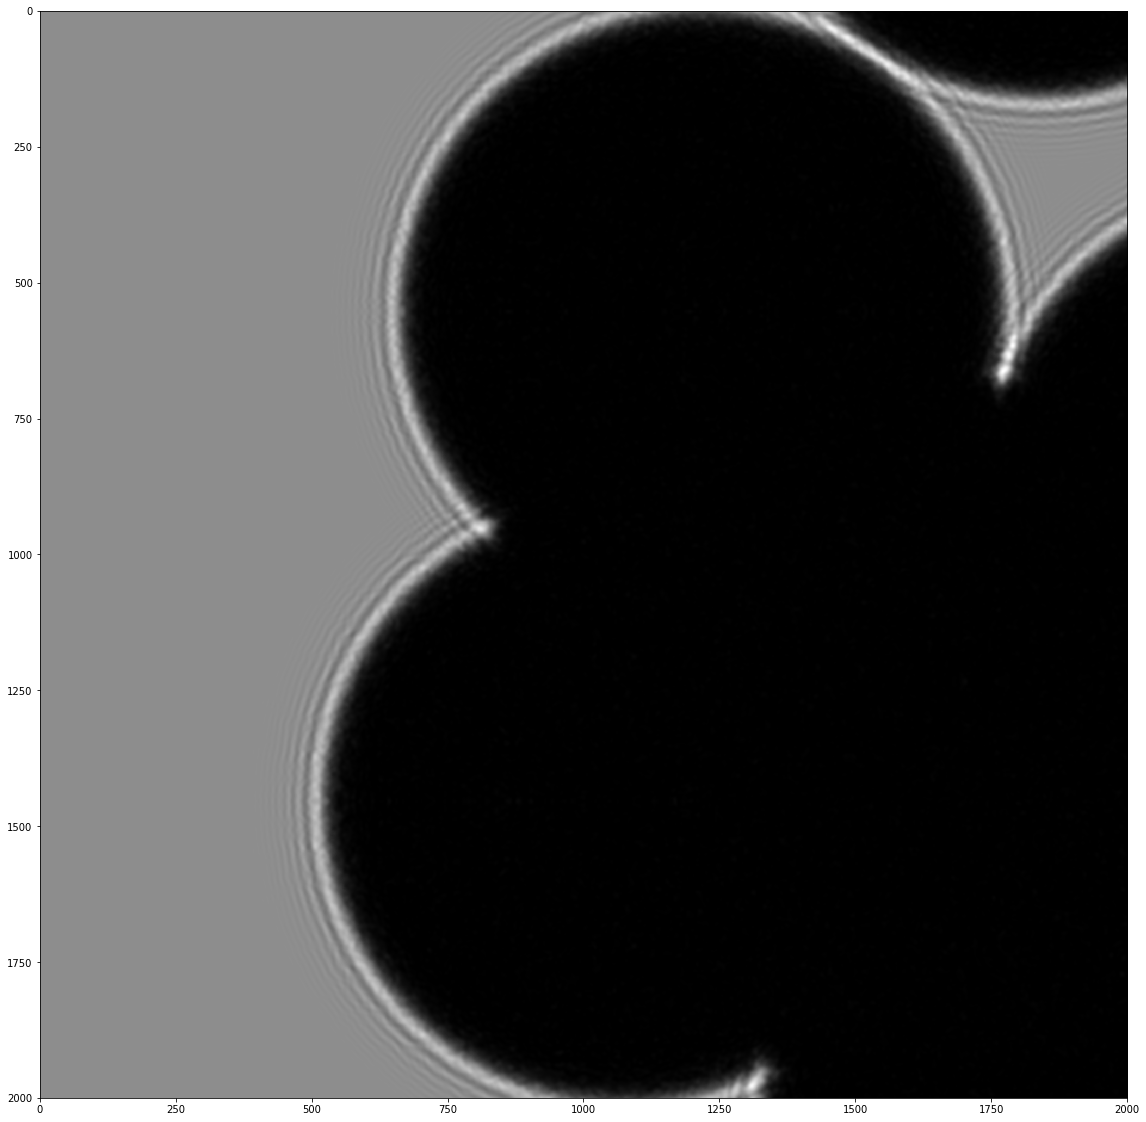

In [279]:
detail = result[4000:6000,4000:6000]
plt.figure(figsize = (20,20))
plt.imshow(detail, vmin=0., vmax=np.max(result)*1, cmap='gray')
plt.show() 

In [282]:
detail[800,800]

1.7345673425645495e+26